In [1]:
import bisect
import matplotlib.pyplot as plt
import pickle
import numpy as np
from scipy.optimize import curve_fit

file = open('particle_trajectories', 'rb')
solutions = pickle.load(file)
file.close()

In [2]:
def serial_s(time,t,y1,y2):
    serial_number = bisect.bisect_right(t, time)-1
    y1_serial = y1[serial_number]
    y2_serial = y2[serial_number]
    return serial_number,[y1_serial ,y2_serial]

total_number_of_points = 100   # need to adapt to the data
points_t = np.zeros((total_number_of_points,2))   # need to adapt to the data
times_macro = np.arange(0,10000,50)
times_micro = np.arange(0,100,1)   # time period, can vary
rho_bar = 2   # can vary
threshold = np.sqrt(2 * np.pi * rho_bar) / 200
prop_s_macro = []
prop_s_micro = []  

for time in times_macro:
    i = 0
    rho_t = []
    for solution in solutions:      
        t = solution.t
        y1 = solution.y[0]
        y2 = solution.y[1]        
        serial_number,[y1_serial, y2_serial] = serial_s(time, t, y1, y2)
        points_t[i] = [y1_serial, y2_serial]
        i = i + 1       
    for target_point in points_t:      
        points_nearby = len([p for p in points_t if np.linalg.norm(p - target_point) <= threshold])
        rho_t = np.append(rho_t, points_nearby)
        
    heaviside = rho_t[rho_t >= rho_bar]
    proportion = len(heaviside) / total_number_of_points
    prop_s_macro = np.append(prop_s_macro, proportion) 
    
for time in times_micro:
    i = 0
    rho_t = []
    for solution in solutions:      
        t = solution.t
        y1 = solution.y[0]
        y2 = solution.y[1]        
        serial_number,[y1_serial, y2_serial] = serial_s(time, t, y1, y2)
        points_t[i] = [y1_serial, y2_serial]
        i = i + 1       
    for target_point in points_t:      
        points_nearby = len([p for p in points_t if np.linalg.norm(p - target_point) <= threshold])
        rho_t = np.append(rho_t, points_nearby)
        
    heaviside = rho_t[rho_t >= rho_bar]
    proportion = len(heaviside) / total_number_of_points
    prop_s_micro = np.append(prop_s_micro, proportion) 

the clustering rate is: 0.06078916177174894


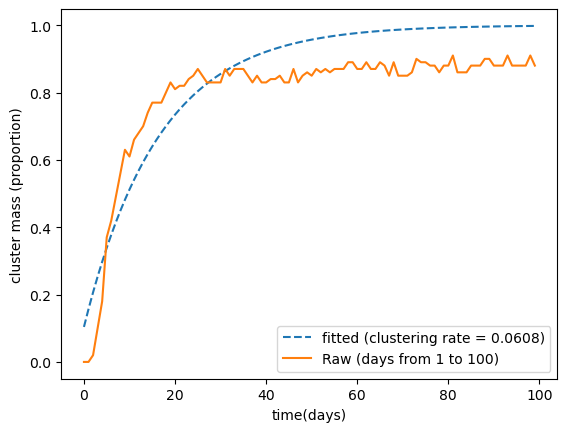

In [3]:
def func(times, A, Rm):
    return 1 - A * np.exp(-Rm * times)
para_s, pcov = curve_fit(func, times_micro, prop_s_micro)
A, Rm = para_s
plt.plot(times_micro, func(times_micro,A,Rm),linestyle = '--', label = "fitted (clustering rate = 0.0608)")
plt.plot(times_micro, prop_s_micro, label = "Raw (days from 1 to 100)")
plt.legend(loc = 'lower right')
plt.xlabel('time(days)')
plt.ylabel('cluster mass (proportion)')
print("the clustering rate is:", Rm)
plt.savefig('Micro.png')

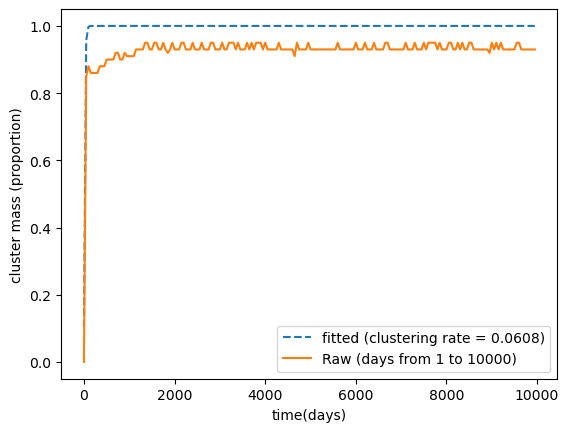

In [4]:
# def func(times, A, Rm):
#     return 1 - A * np.exp(-Rm * times)
# para_s, pcov = curve_fit(func, times_macro, prop_s_macro)
# A, Rm = para_s
plt.plot(times_macro, func(times_macro,A,Rm),linestyle = '--', label = "fitted (clustering rate = 0.0608)")
plt.plot(times_macro, prop_s_macro, label = "Raw (days from 1 to 10000)")
plt.xlabel('time(days)')
plt.ylabel('cluster mass (proportion)')
plt.legend(loc = 'lower right')
plt.savefig('Macro.png')